In [42]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data_recipe_details = pd.read_csv("CulinaryDB/01_Recipe_Details.csv")
data_ingredients = pd.read_csv("CulinaryDB/02_Ingredients.csv")
data_compound_ingredients = pd.read_csv("CulinaryDB/03_Compound_Ingredients.csv")
data_recipe_ingredients = pd.read_csv("CulinaryDB/04_Recipe-Ingredients_Aliases.csv")

In [3]:
# Updating column name 
data_compound_ingredients.rename(columns= {'entity_id': 'Entity ID'}, inplace= True)

In [4]:
italian_cuisine = data_recipe_details[data_recipe_details['Cuisine'] == 'Italy']
italian_cuisine.drop(columns= ['Source'], inplace= True)
italian_cuisine.head()

C:\Users\keera\AppData\Local\Temp\ipykernel_1556\2014076312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italian_cuisine.drop(columns= ['Source'], inplace= True)


,Recipe ID,Title,Cuisine
9318,9319,California Italian Wedding Soup,Italy
9319,9320,Jamie's Minestrone,Italy
9320,9321,Tuscan Style Bean Soup,Italy
9321,9322,Mediterranean Fish Stew,Italy
9322,9323,Rosemary Tomato Leek Soup,Italy


In [5]:
data_recipe_merge = pd.merge(italian_cuisine, data_recipe_ingredients, on='Recipe ID')
data_recipe_merge.drop(columns= ['Original Ingredient Name', 'Aliased Ingredient Name'], inplace= True)
data_recipe_merge.head()

,Recipe ID,Title,Cuisine,Entity ID
0,9319,California Italian Wedding Soup,Italy,250
1,9319,California Italian Wedding Soup,Italy,270
2,9319,California Italian Wedding Soup,Italy,78
3,9319,California Italian Wedding Soup,Italy,272
4,9319,California Italian Wedding Soup,Italy,0


In [6]:
test = pd.merge(data_recipe_merge, data_ingredients, on='Entity ID')
test.drop(columns= ['Ingredient Synonyms', 'Category'], inplace= True)
test.head()

,Recipe ID,Title,Cuisine,Entity ID,Aliased Ingredient Name
0,9319,California Italian Wedding Soup,Italy,250,Basil
1,9319,California Italian Wedding Soup,Italy,270,Beef
2,9319,California Italian Wedding Soup,Italy,78,Parmesan Cheese
3,9319,California Italian Wedding Soup,Italy,272,Chicken
4,9319,California Italian Wedding Soup,Italy,0,Egg


In [16]:
df_encoded = pd.get_dummies(test, columns=['Aliased Ingredient Name'], prefix='', prefix_sep='')
df_encoded.head()

,Recipe ID,Title,Cuisine,Entity ID,Agave,Alfalfa,Allspice,Almond,Amaranth,Anise,...,Wild boar,Wild duck,Wild rice,Wine,Winter squash,Wonton wrapper,Yam,Yeast,Yogurt,Zucchini
0,9319,California Italian Wedding Soup,Italy,250,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9319,California Italian Wedding Soup,Italy,270,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9319,California Italian Wedding Soup,Italy,78,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9319,California Italian Wedding Soup,Italy,272,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9319,California Italian Wedding Soup,Italy,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_grouped = df_encoded.groupby(['Recipe ID', 'Title', 'Cuisine'], as_index=False).sum()
df_grouped.drop(columns= ['Entity ID', 'Cuisine'], inplace= True)
df_grouped.head()

,Recipe ID,Title,Agave,Alfalfa,Allspice,Almond,Amaranth,Anise,Apple,Apple Cider Vinegar,...,Wild boar,Wild duck,Wild rice,Wine,Winter squash,Wonton wrapper,Yam,Yeast,Yogurt,Zucchini
0,9319,California Italian Wedding Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,Jamie's Minestrone,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9321,Tuscan Style Bean Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9322,Mediterranean Fish Stew,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9323,Rosemary Tomato Leek Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

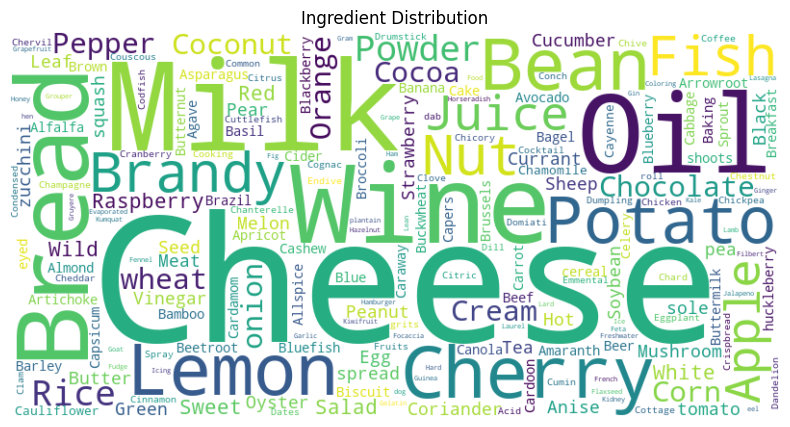

In [44]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_grouped.columns[2:]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Distribution')
plt.show()

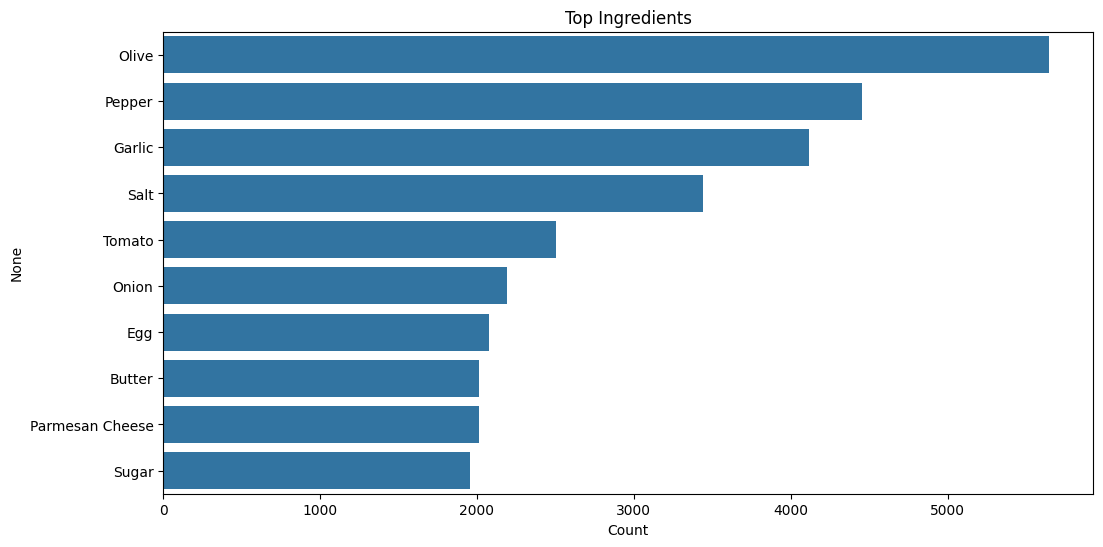

In [40]:
# Top Ingredients
top_ingredients = df_grouped.iloc[:, 2:].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top Ingredients')
plt.xlabel('Count')
plt.show()

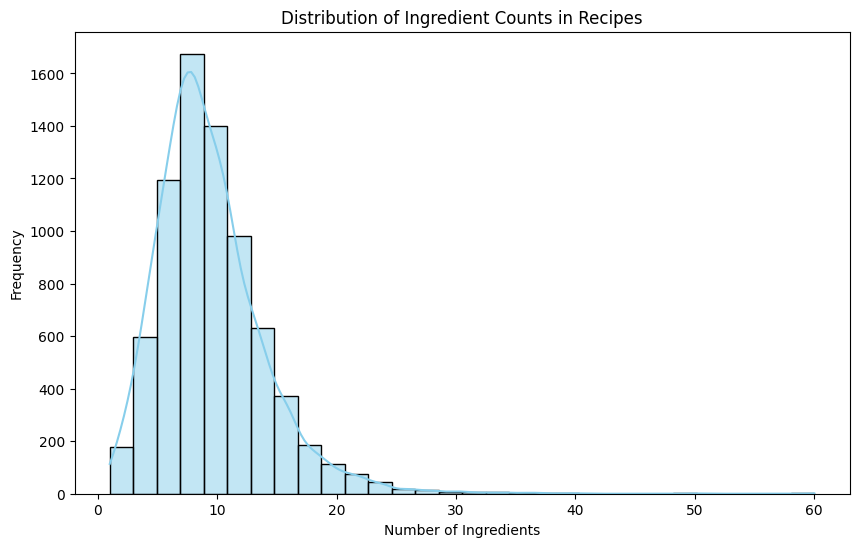

In [41]:
# Recipe Ingredient Counts
ingredient_counts = df_grouped.iloc[:, 2:].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_counts, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ingredient Counts in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

In [46]:
df_grouped.sum()

Recipe ID                                                 179885325
Title             California Italian Wedding SoupJamie's Minestr...
Agave                                                             3
Alfalfa                                                           1
Allspice                                                         26
                                        ...                        
Wonton wrapper                                                   19
Yam                                                               2
Yeast                                                           259
Yogurt                                                           33
Zucchini                                                        321
Length: 387, dtype: object

In [69]:
# Calculate the sum of each ingredient column
ingredient_sums = df_grouped.iloc[:, 2:].sum()

# Identify columns to keep (sum >= 10)
columns_to_keep = ingredient_sums[ingredient_sums >= 10].index

# Filter the DataFrame to keep only relevant columns
df_filtered = df_grouped[['Recipe ID', 'Title'] + list(columns_to_keep)]

# Identify rows to keep (sum of ingredients in selected columns > 0)
rows_to_keep = df_filtered[df_filtered.iloc[:, 2:].sum(axis=1) > 5]

# Display the filtered DataFrame
rows_to_keep.reset_index(inplace= True, drop= True)

In [70]:
rows_to_keep

,Recipe ID,Title,Allspice,Almond,Anise,Apple,Apple Cider Vinegar,Apricot,Artichoke,Asparagus,...,White Pepper,White Wine,Wholewheat Bread,Wild duck,Wine,Winter squash,Wonton wrapper,Yeast,Yogurt,Zucchini
0,9319,California Italian Wedding Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,Jamie's Minestrone,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9321,Tuscan Style Bean Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9322,Mediterranean Fish Stew,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9323,Rosemary Tomato Leek Soup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,41183,Chicken Liver and Sage Crostini,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6159,41184,"Spaghetti with Olive Oil, Garlic and Anchovies",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160,41185,Tuscan Panzanella,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6161,41186,Linguine with Zucchini and Mint,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
# import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df is your dataset
# You may need to preprocess your data and handle missing values accordingly

# Select only the columns with ingredients
ingredient_columns = rows_to_keep.columns[2:]

# Create a binary matrix (0 or 1) from the ingredient columns
binary_matrix = rows_to_keep[ingredient_columns].values

# Apply PCA for dimensionality reduction
n_components = 10  # Adjust as needed
pca = PCA(n_components=n_components)
reduced_matrix = pca.fit_transform(binary_matrix)

# Compute cosine similarity on the reduced matrix
similarities = cosine_similarity(reduced_matrix)

# Function to get recipe recommendations based on ingredients
def get_recommendations(recipe_id, df= rows_to_keep, similarities=similarities):
    # Get the index of the specified recipe
    idx = df.index[df['Recipe ID'] == recipe_id].tolist()[0]

    # Get similarity scores for the specified recipe
    recipe_similarities = similarities[idx]

    # Create a DataFrame with Recipe ID, title, and corresponding similarity scores
    sim_df = pd.DataFrame({
        'Recipe ID': df['Recipe ID'],
        'Title': df['Title'],
        'Similarity': recipe_similarities
    })

    # Sort by similarity in descending order
    sim_df = sim_df.sort_values(by='Similarity', ascending=False)

    # Exclude the recipe itself and get top 10 similar recipes
    recommendations = sim_df[sim_df['Recipe ID'] != recipe_id].head(10)

    return recommendations[['Recipe ID', 'Title']]

In [72]:
# Example: Get recommendations for a specific recipe (e.g., Recipe ID 9319)
recommendations = get_recommendations(9319)
print(recommendations)

      Recipe ID                                              Title
711       10229                            Italian Wedding Soup II
2067      22748                Zucchini Ripieni (Stuffed Zucchini)
835       10382                             Italian Wedding Soup I
45         9364                        Mama's Italian Wedding Soup
1458      11101                           Meat-Free Stuffed Shells
5217      39992                    Asparagus and Parmesan Puddings
938       10504                       A 20-Minute Chicken Parmesan
4892      39585  Risotto Croquettes with Mozzarella and Prosciutto
1560      11212                                     Easy Lasagna I
771       10299                 The Soup with the Little Meatballs


In [88]:
def evaluate_accuracy():
    total_accuracy = 0
    num_queries = 0

    for recipe_id in rows_to_keep['Recipe ID'].unique():
        actual_ingredients = rows_to_keep[rows_to_keep['Recipe ID'] == recipe_id][ingredient_columns].values.flatten()
        recommended_recipes = get_recommendations(recipe_id)['Recipe ID'].tolist()

        # Ensure both arrays have the same size
        if len(recommended_recipes) > len(actual_ingredients):
            recommended_recipes = recommended_recipes[:len(actual_ingredients)]
        elif len(recommended_recipes) < len(actual_ingredients):
            actual_ingredients = actual_ingredients[:len(recommended_recipes)]

        if len(recommended_recipes) > 0:
            actual_vector = actual_ingredients.reshape(1, -1)
            
            # Filter the DataFrame to include only recommended recipes
            recommended_df = rows_to_keep[rows_to_keep['Recipe ID'].isin(recommended_recipes)]
            
            # print(actual_vector.shape)
            # print(recommended_df[ingredient_columns].shape)
            # Ensure both matrices have the same number of columns
            if actual_vector.shape[1] != recommended_df[ingredient_columns].shape[1]:
                continue  # Skip if dimensions don't match

            # Compute cosine similarity
            similarity_scores = cosine_similarity(actual_vector, recommended_df[ingredient_columns])
            
            # Extract the similarity score for the specific recipe
            average_similarity = similarity_scores[0].mean()

            total_accuracy += average_similarity
            num_queries += 1

    avg_accuracy = total_accuracy / num_queries if num_queries > 0 else 0
    return avg_accuracy

In [89]:
accuracy = evaluate_accuracy()
print(f'Average Cosine Similarity (Accuracy): {accuracy}')

(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(10, 225)
(1, 10)
(1